# Package Installation 

In [1]:
# %pip install ucimlrepo
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install scipy
# %pip install joblib

# Import Library

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from scipy.stats import zscore
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline

# Loading Dataset

- read csv file path from uci repo
- open csv file with pandas, to use pandas function 

In [3]:
# get dataset from uci repo 
creditApproval = fetch_ucirepo(id=27) 

# metadata - get csv file
ca_csv = creditApproval.metadata.data_url
print(ca_csv) 

https://archive.ics.uci.edu/static/public/27/data.csv


## Reading Data into DataFrames

In [4]:
# open csv file with pandas dataframe 
ca_df = pd.read_csv(ca_csv)

ca_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


# Data Overview and Initial Inspection

## Data Shape ( Total Rows and Columns )

In [5]:
# get the number of row and column by pandas ( row, col )
ca_df.shape

(690, 16)

## Column Names 

In [6]:
# display all column name 
ca_df.columns.values

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'], dtype=object)

#### Online resource explain

The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but **[this blog](https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html)** gives us a pretty good overview of the probable features. The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.

## Head of the Dataset 

In [7]:
# get first few row data 
ca_df.head(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


## Tail of the Dataset 

In [8]:
# get last few row data 
ca_df.tail(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,465.0,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,0.0,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,240.0,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256.0,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260.0,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,240.0,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,129.0,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,100.0,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,0.0,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,0.0,0,-


## Data Types

In [9]:
# check each col datatype 
ca_df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

## Basic Structure Overview 

In [10]:
# get the summary by dataframes structure 
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


#### NOTE 
- ALL the datatype is correct and same with what we display justnow 
- 4 is in float, 2 in integer and 10 in object 

## Summary Statistics 

In [11]:
# view Categorical data columns statistics result
ca_df.describe(include='object')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [12]:
# view continuous data columns statistics result including min, max, mean and count 
ca_df.describe(exclude='object')

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


##### NOTE:
- freq is the most common value’s frequency

## Check for Duplicate Rows

In [13]:
# get duplicated row 
print("Duplicated rows > ", ca_df.duplicated().sum())

Duplicated rows >  0


- no duplicated data exist

## Count of Unique Values per Column

In [14]:
# to understand each Categorical data column have what unique data 
for col in ca_df.select_dtypes('object').columns :
    print("Column Name > ", col)
    unique = ca_df[col].unique()
    print("No of Unique Data > ", len(unique))
    print("Unique Data Exist > ", unique)
    print("\n")

Column Name >  A1
No of Unique Data >  3
Unique Data Exist >  ['b' 'a' nan]


Column Name >  A4
No of Unique Data >  4
Unique Data Exist >  ['u' 'y' nan 'l']


Column Name >  A5
No of Unique Data >  4
Unique Data Exist >  ['g' 'p' nan 'gg']


Column Name >  A6
No of Unique Data >  15
Unique Data Exist >  ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]


Column Name >  A7
No of Unique Data >  10
Unique Data Exist >  ['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']


Column Name >  A9
No of Unique Data >  2
Unique Data Exist >  ['t' 'f']


Column Name >  A10
No of Unique Data >  2
Unique Data Exist >  ['t' 'f']


Column Name >  A12
No of Unique Data >  2
Unique Data Exist >  ['f' 't']


Column Name >  A13
No of Unique Data >  3
Unique Data Exist >  ['g' 's' 'p']


Column Name >  A16
No of Unique Data >  2
Unique Data Exist >  ['+' '-']




# Identify Missing Values

In [15]:
ca_df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

#### NOTE 
- total 16 column and 7 column have missing value
  - A1, 2, 4, 5, 6, 7, 14 ( MISSING VALUE )

## Visualize Missingness 

In [16]:
# ca_df['A1'].dtype
ca_df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

**[ How to change color for sns boxplot ](https://www.statology.org/seaborn-barplot-color/)**

C:\Users\jeanl\AppData\Local\Temp\ipykernel_1968\2265792644.py:9: UserWarning: The palette list has more values (16) than needed (3), which may not be intended.
  sns.barplot(x=missingData.index, y=missingData.values, palette=mdColor, hue=ca_df.dtypes)


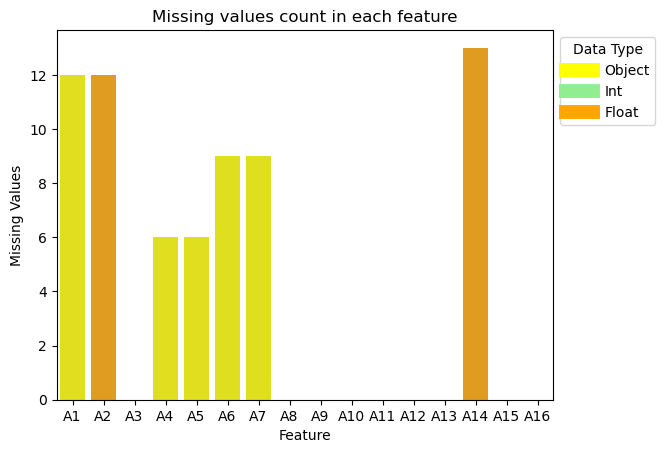

NULL Object >  42
NULL Int >  0
NULL Float >  25


In [17]:
missingData = ca_df.isna().sum()

continuous = ca_df.select_dtypes(exclude='object')
categorical = ca_df.select_dtypes(include='object')

mdColor = ['yellow' if ca_df[x].dtype == 'O' else 'lightgreen' if ca_df[x].dtype == 'int64' else 'orange' for x in missingData.index]

# plot graph
sns.barplot(x=missingData.index, y=missingData.values, palette=mdColor, hue=ca_df.dtypes)

legend_handles = [plt.Line2D([0], [0], color='yellow', lw=10, label='Object'),
                  plt.Line2D([0], [0], color='lightgreen', lw=10, label='Int'),
                  plt.Line2D([0], [0], color='orange', lw=10, label='Float')]

plt.legend(title="Data Type", bbox_to_anchor=(1, 1), handles=legend_handles)
plt.title('Missing values count in each feature')
plt.xlabel('Feature')
plt.ylabel('Missing Values')

plt.show()

# Conclusion
print("NULL Object > ", ca_df.select_dtypes('object').isna().sum().sum())
print("NULL Int > ", ca_df.select_dtypes('int').isna().sum().sum())
print("NULL Float > ", ca_df.select_dtypes('float').isna().sum().sum())

# Data Visualization

## Data Distribution

### Pie Chart ( Categorical Data )

- categorical data
  - how many category
  - each category how many percentage

In [18]:
# show out all column with categorical data 
ca_df.describe(include='object')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [19]:
colorMap = [
            '#7695FF',
            '#9DBDFF',
            '#FF9874', 
            '#FFD7C4',
            '#F6E96B', 
            '#BEDC74',
            '#A2CA71',
            '#FF8C9E',
            '#FF8225', 
            '#EF5A6F', 
            '#6C946F',
            '#E68369',
            '#DCA47C', 
            '#36BA98'
            ]

def colorShuffle():
    random.shuffle(colorMap)

len(colorMap)

14

In [20]:
# function for control the auto percentage format 
def autopct_format(percentage, values):
    # sum the category a and b together and get total 
    total = sum(values)

    # convert percentage back to number 
    val = int(round(percentage*total/100.0))
    
    return f'{percentage:.2f}%  ({val:d})' # .2%, two decimal point, the other 2 % is the format 

def plotPieChart(col, figsize):
    # get the category exist in the col and distribute of the data 
    dis = ca_df[col].value_counts()
    
    colorShuffle()

    plt.figure(figsize=figsize) 
    plt.pie(dis, labels=dis.index, autopct=lambda percentage: autopct_format(percentage, dis), colors=colorMap) 
    plt.title(f"Distribution of Category Data {col}")
    plt.legend(title=f"Category of {col}")
    plt.show() 

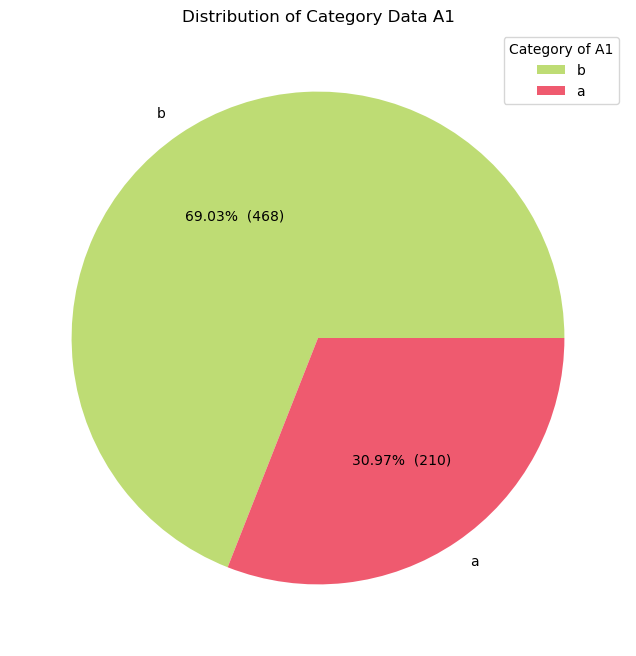

In [21]:
# create a pie chart 
plotPieChart('A1', (10,8))

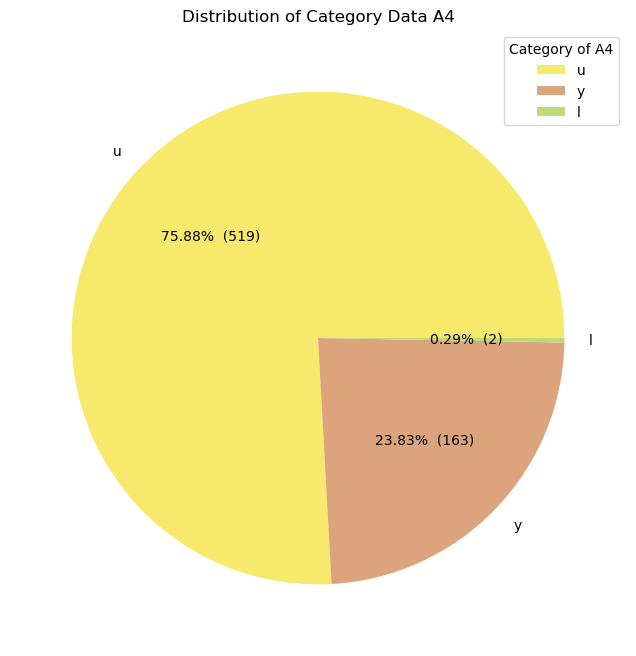

In [22]:
# create a pie chart 
plotPieChart('A4', (10,8))

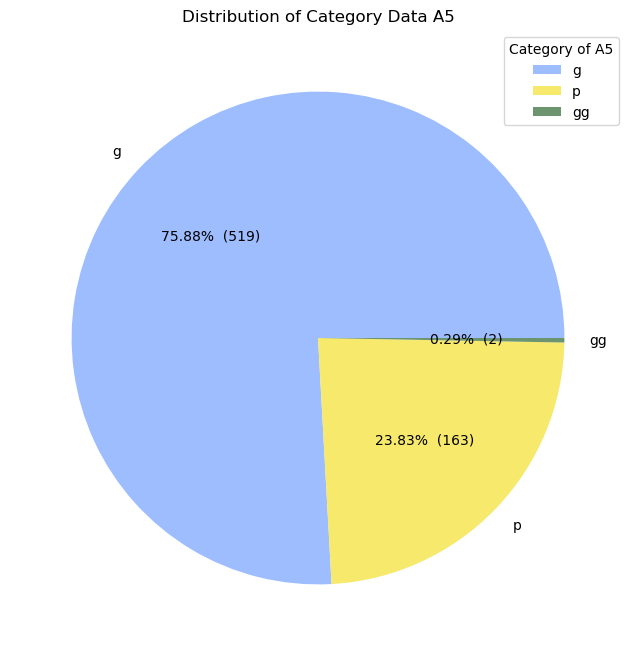

In [23]:
# create a pie chart 
plotPieChart('A5', (10,8))

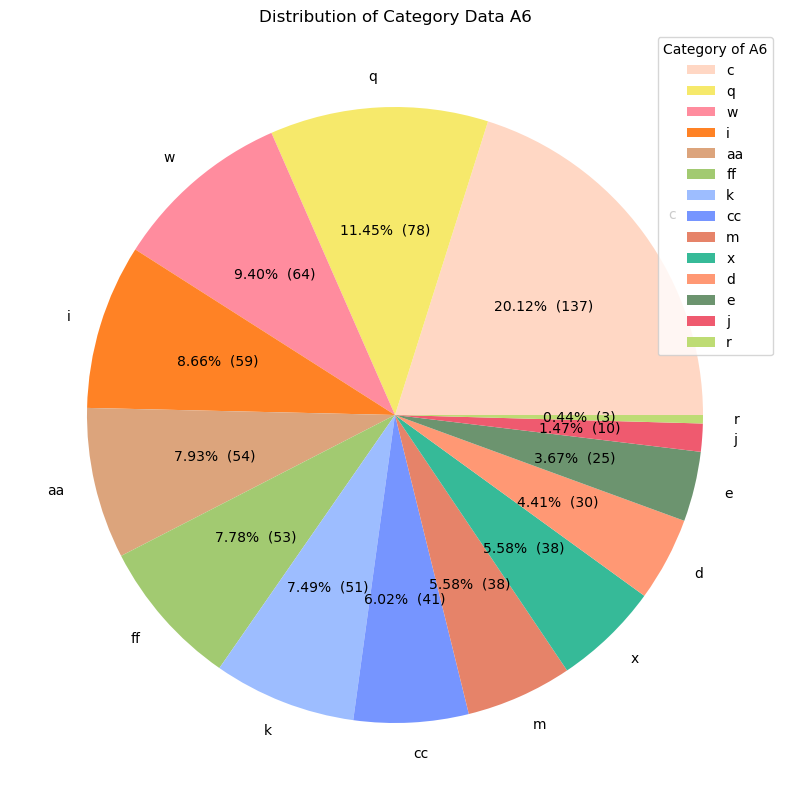

In [24]:
# create a pie chart 
plotPieChart('A6', (11,10))

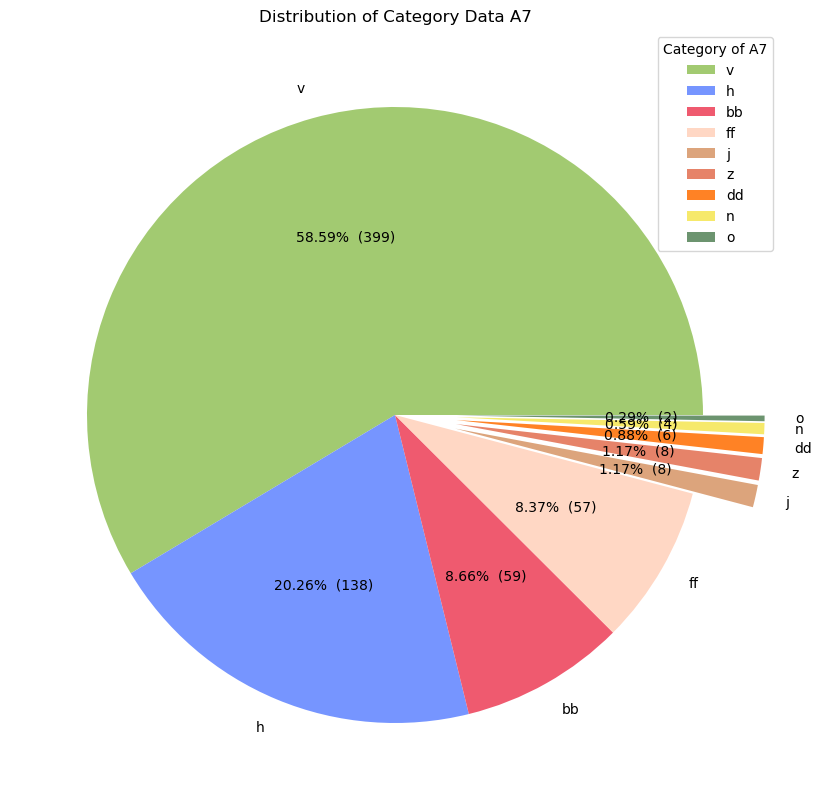

In [25]:
# get the category exist in the col A7 and distribute of the data 
aseven_dis = ca_df['A7'].value_counts()

colorShuffle()

# set explode value
# explode the small distribution category so can clearly visualize it 
explode = (0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2)

# create a pie chart 
plt.figure(figsize=(11,10)) 
plt.pie(aseven_dis, labels=aseven_dis.index, autopct=lambda percentage: autopct_format(percentage, aseven_dis), colors=colorMap, explode=explode) 
plt.title("Distribution of Category Data A7")
plt.legend(title="Category of A7")
plt.show() 

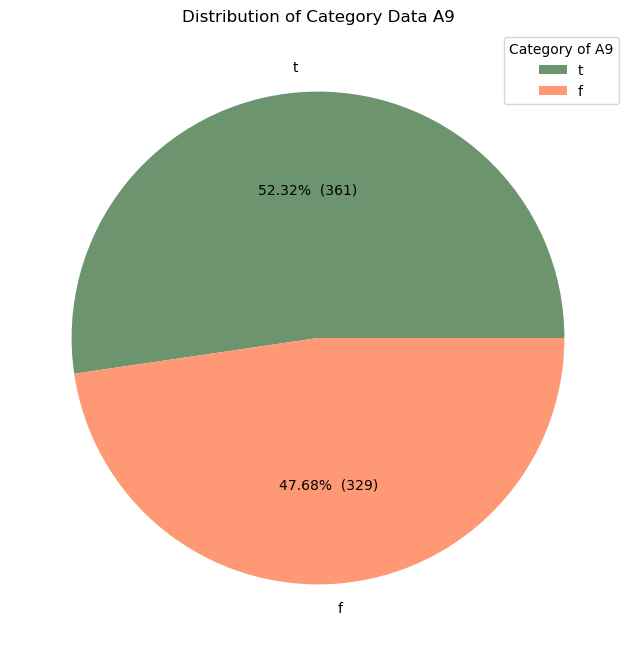

In [26]:
# create a pie chart 
plotPieChart('A9', (10,8))

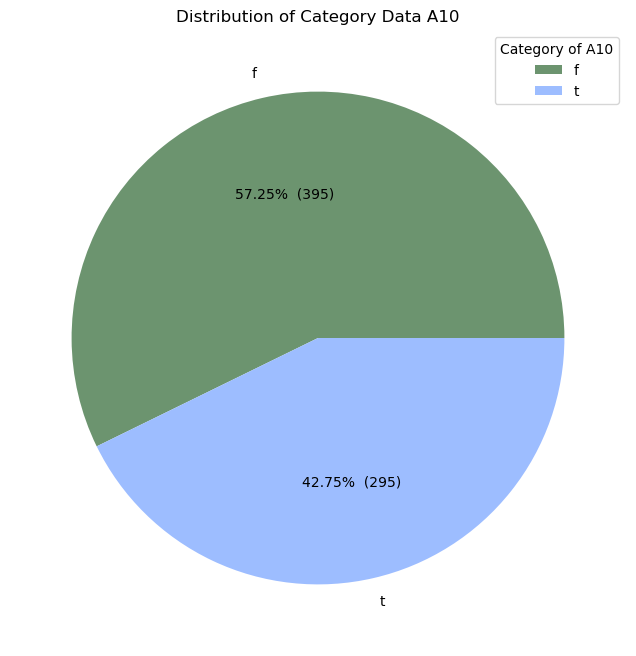

In [27]:
# create a pie chart 
plotPieChart('A10', (10,8))

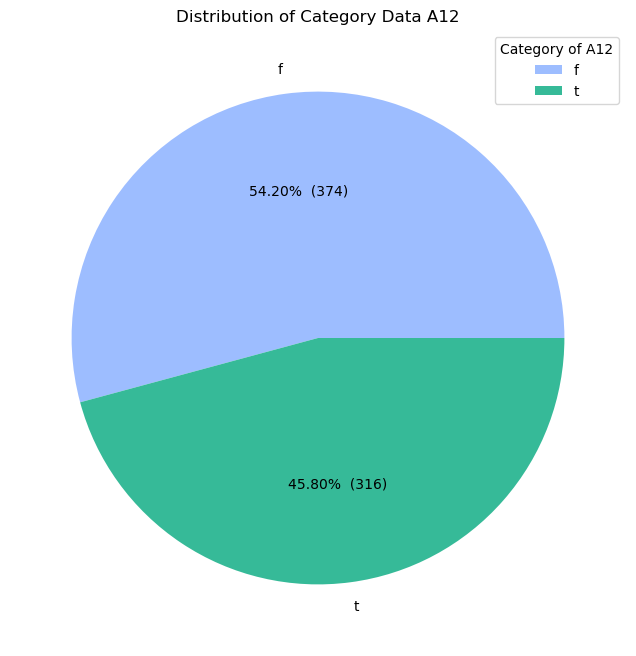

In [28]:
# create a pie chart 
plotPieChart('A12', (10,8))

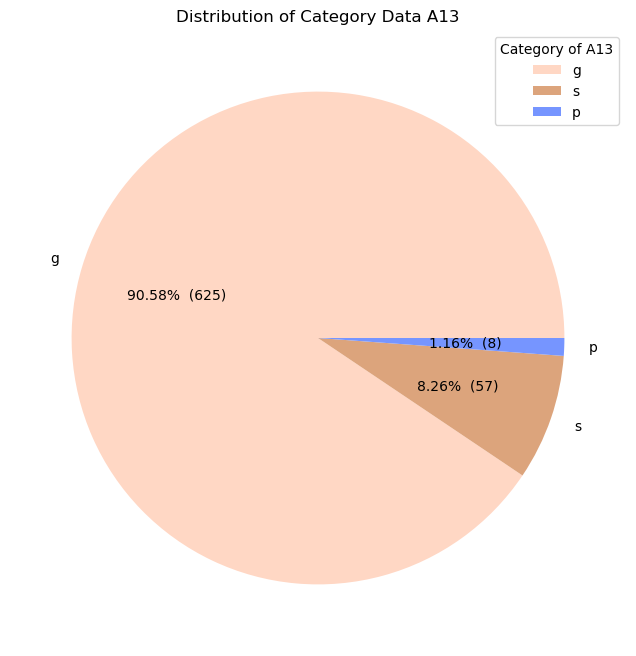

In [29]:
# create a pie chart 
plotPieChart('A13', (10,8))

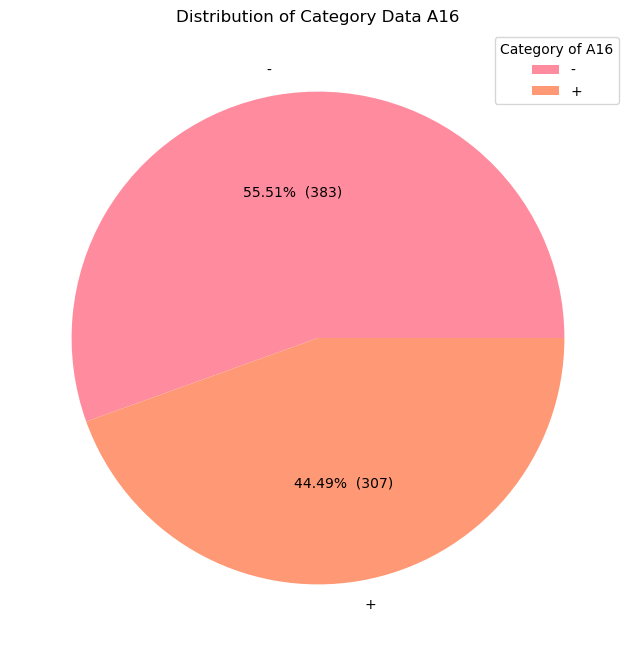

In [30]:
# create a pie chart 
plotPieChart('A16', (10,8))

### Heatmap ( Categorical Data )
- A9, 10, 12

> due to **A1 have missing value**, so here only show 678 data <br>
> if want to change can using A16 to change 

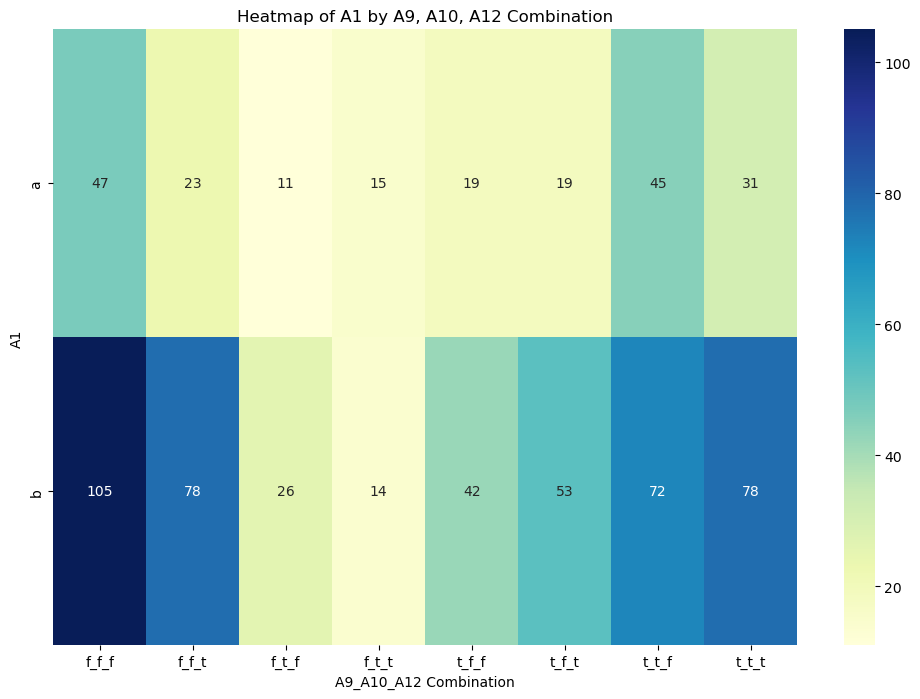

In [31]:
cpy_df = ca_df.copy()

# Combine A9 and A10 and A11 to create a unique key
cpy_df['A9_A10_A12'] = cpy_df['A9'].astype(str) + "_" + cpy_df['A10'].astype(str) + "_" + cpy_df['A12'].astype(str)

# Create a pivot table with A1 as values and A9_A10 as columns
pivot_table = cpy_df.pivot_table(index='A1', columns='A9_A10_A12', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Heatmap of A1 by A9, A10, A12 Combination")
plt.xlabel("A9_A10_A12 Combination")
plt.ylabel("A1")
plt.show()

### Histogram with Box Plot ( Continuous data )
- To show both the distribution (via histogram) and summary statistics (via box plot) together for a comprehensive view
- Histogram ( shape of distribution )
- Box Plot ( outlier and spread )

In [32]:
# get all columns with continuous data 
ca_df.describe(exclude=["object"])

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [33]:
sns.set_theme(style="darkgrid")

def plotHistBP(col) :
    x = ca_df[col]

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # box plot 
    sns.boxplot(x=x, ax=ax_box, color='lightblue')
    
    # histogram 
    sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    plt.title(f"Distribution of Continuous data {col}")
    
    plt.show()

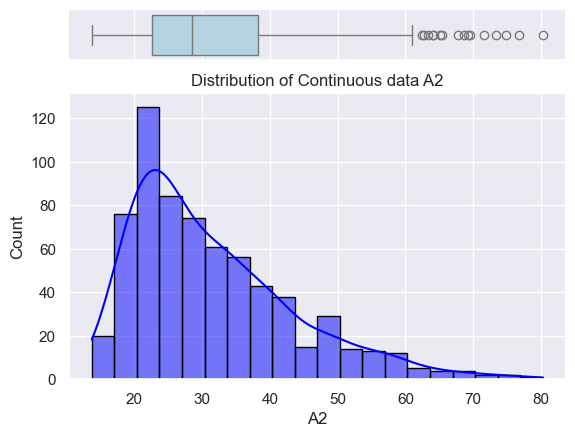

In [34]:
# create histogram with box plot graph
plotHistBP('A2')

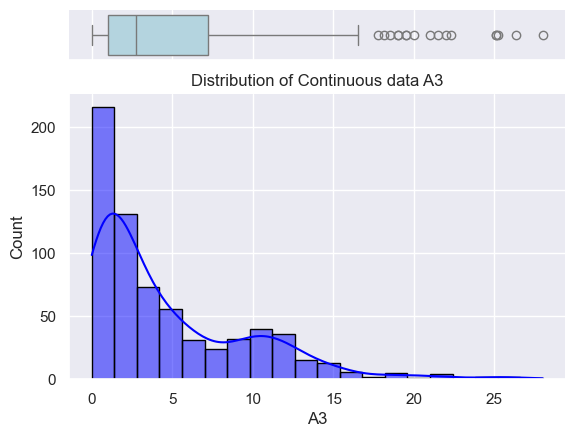

In [35]:
# create histogram with box plot graph
plotHistBP('A3')

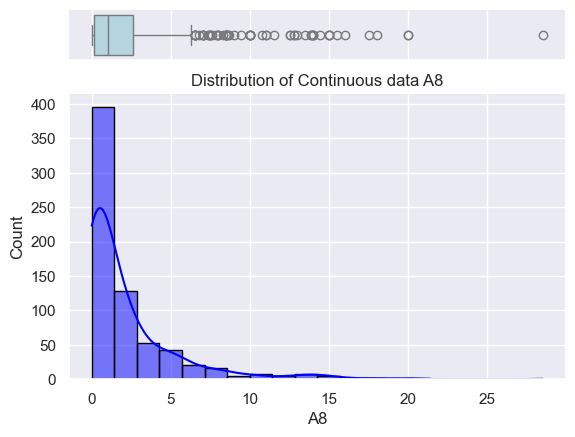

In [36]:
# create histogram with box plot graph
plotHistBP('A8')

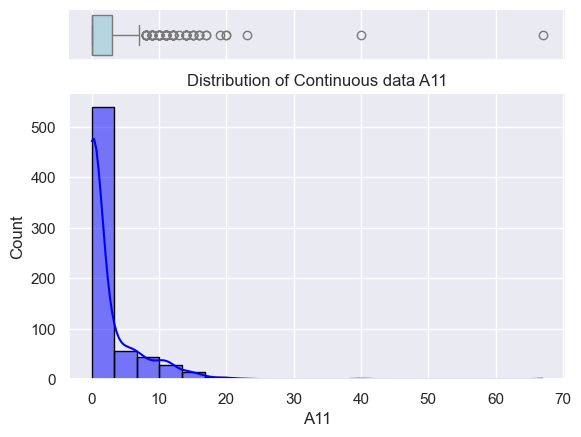

In [37]:
# create histogram with box plot graph
plotHistBP('A11')

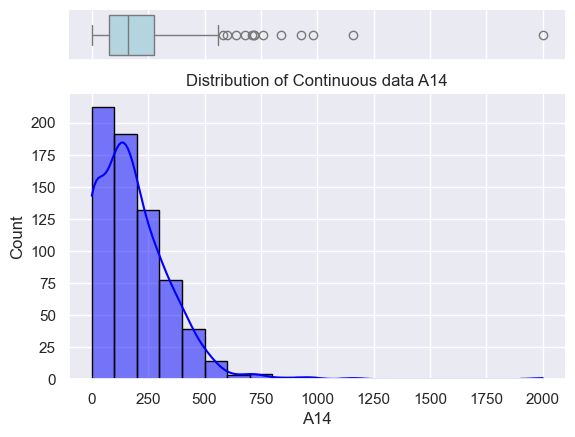

In [38]:
# create histogram with box plot graph
plotHistBP('A14')

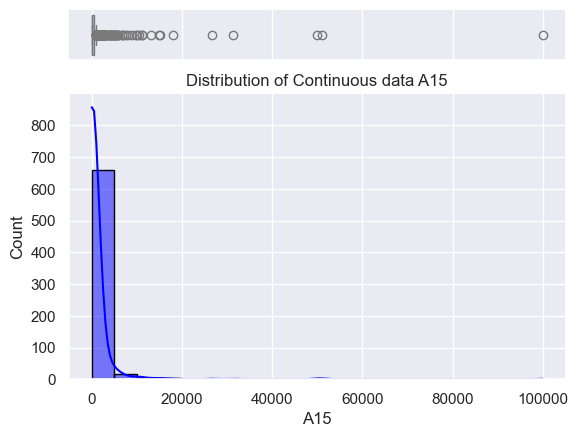

In [39]:
# create histogram with box plot graph
plotHistBP('A15')

## Bivariate Analysis 

### Box Plots for Continuous vs Categorical Variables

In [40]:
def plotBoxPlot(y) :
    plt.figure(figsize=(8, 6))

    # Box plot
    sns.boxplot(x='A16', y=y, data=ca_df)

    # Overlay strip plot for individual data points
    sns.stripplot(x='A16', y=y, data=ca_df, color='red', jitter=True, size=3, alpha=1)
    # alpha = opacity  
    plt.title(f'Box Plot of {y} VS A16 with Data Points')
    plt.xlabel('A16 (Credit Approval: 0 = Yes, 1 = No)')
    plt.ylabel(f'{y} (Continuous Feature)')
    plt.show()

- y = A2 ( continuous )
- x = A16 ( categorical ) ( target ) 

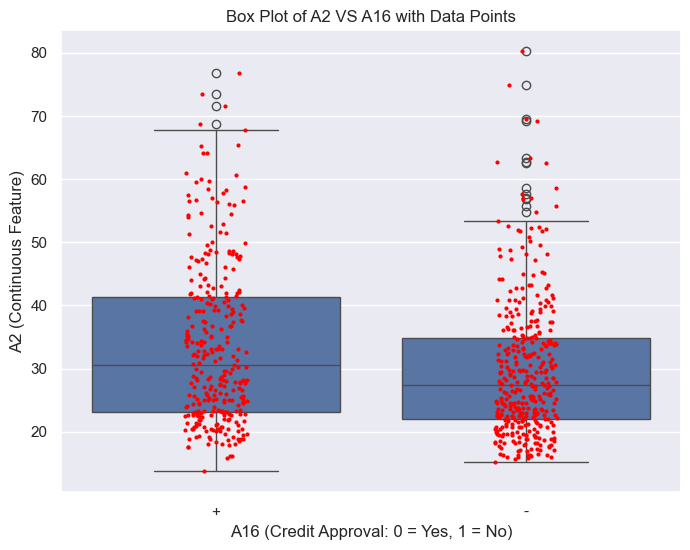

In [41]:
plotBoxPlot('A2')

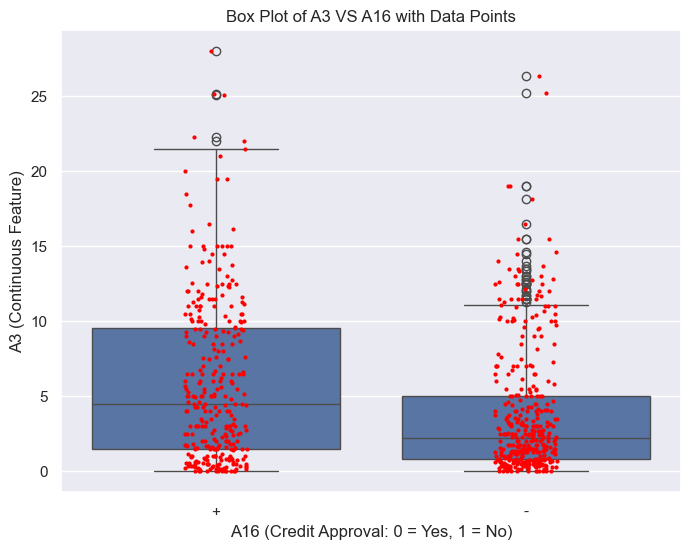

In [42]:
plotBoxPlot('A3')

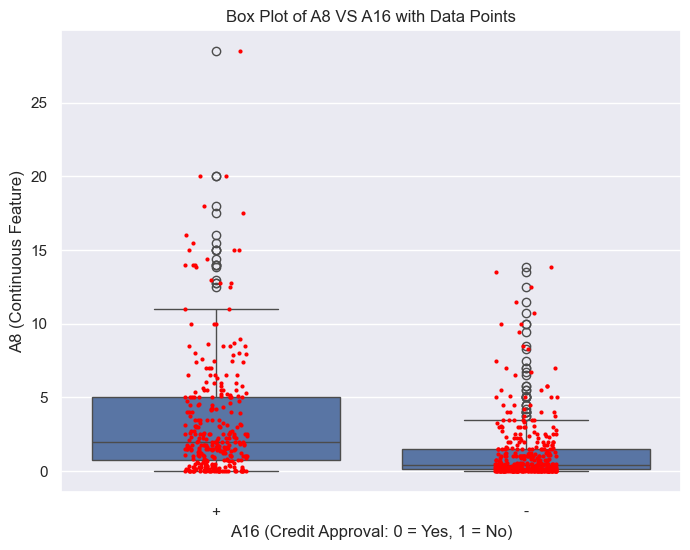

In [43]:
plotBoxPlot('A8')

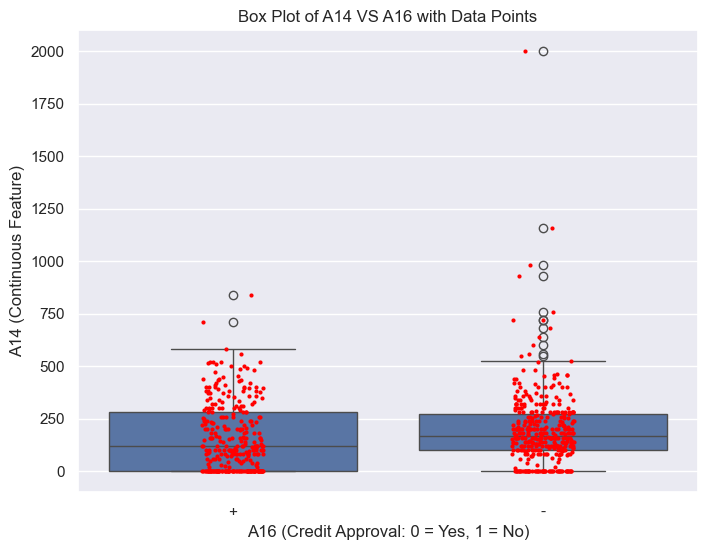

In [44]:
plotBoxPlot('A14')

### Bar Plot For Categorical vs Categorical

In [45]:
def plotBarPlot(y, figsize) :
    colorShuffle()

    color = colorMap.copy()
    
    # set x-axis and hue order
    x = ca_df['A16'].value_counts().sort_index().index
    hue = ca_df[y].value_counts().sort_index().index
    
    # create graph
    plt.figure(figsize=figsize) 
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(data=ca_df, x="A16", hue=y, order=x, hue_order=hue, palette=[color.pop(int(random.random() * len(color))) for x in range(len(hue))])
    ax.legend(title=f"Category of {y}")
    plt.title(f'Box Plot of {y} VS A16 with Data Points')
    plt.xlabel('A16 (Credit Approval: 0 = Yes, 1 = No)')
    plt.ylabel(f'Number of {y} (Categorical Feature)')
    
    # Add the exact number of instances on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')
    
    plt.show()

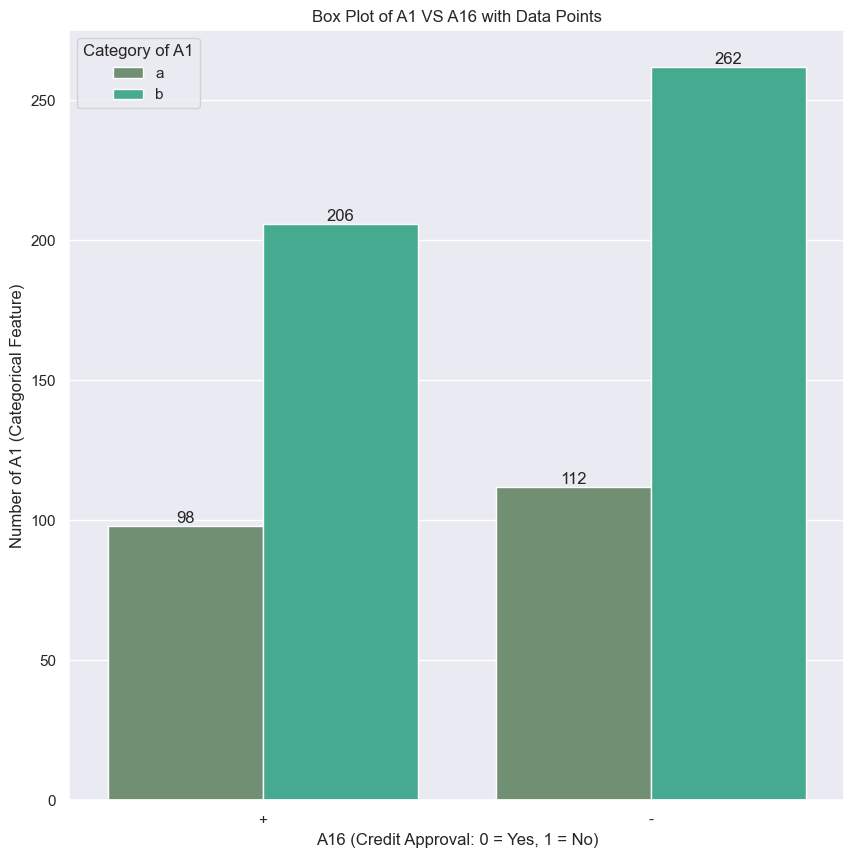

In [46]:
plotBarPlot('A1', (10,10))

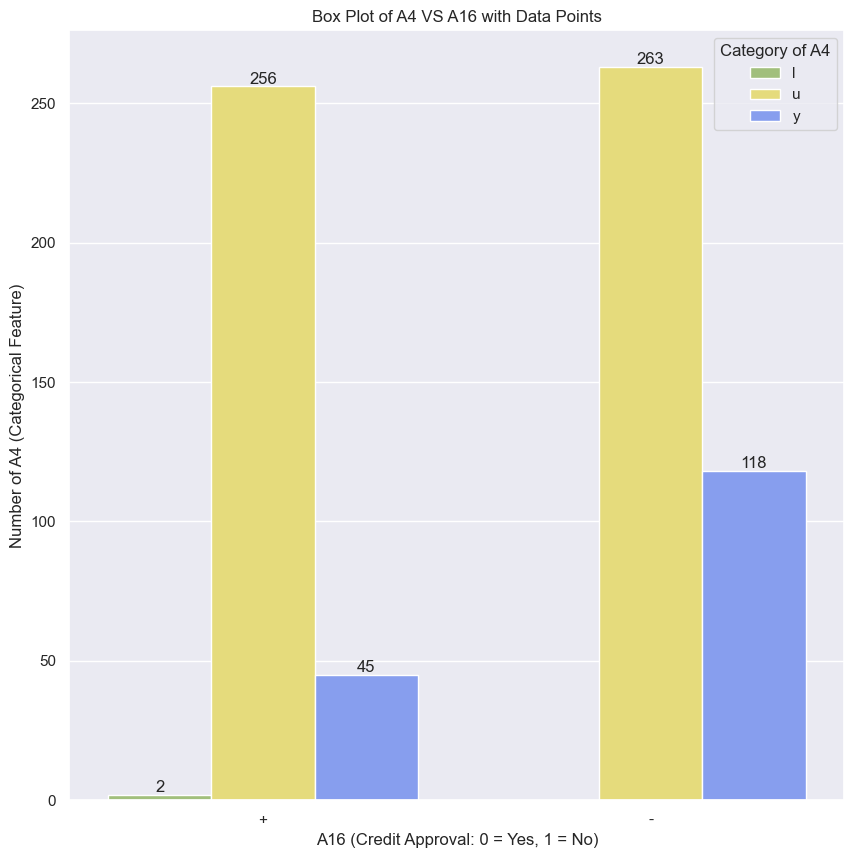

In [47]:
plotBarPlot('A4', (10,10))

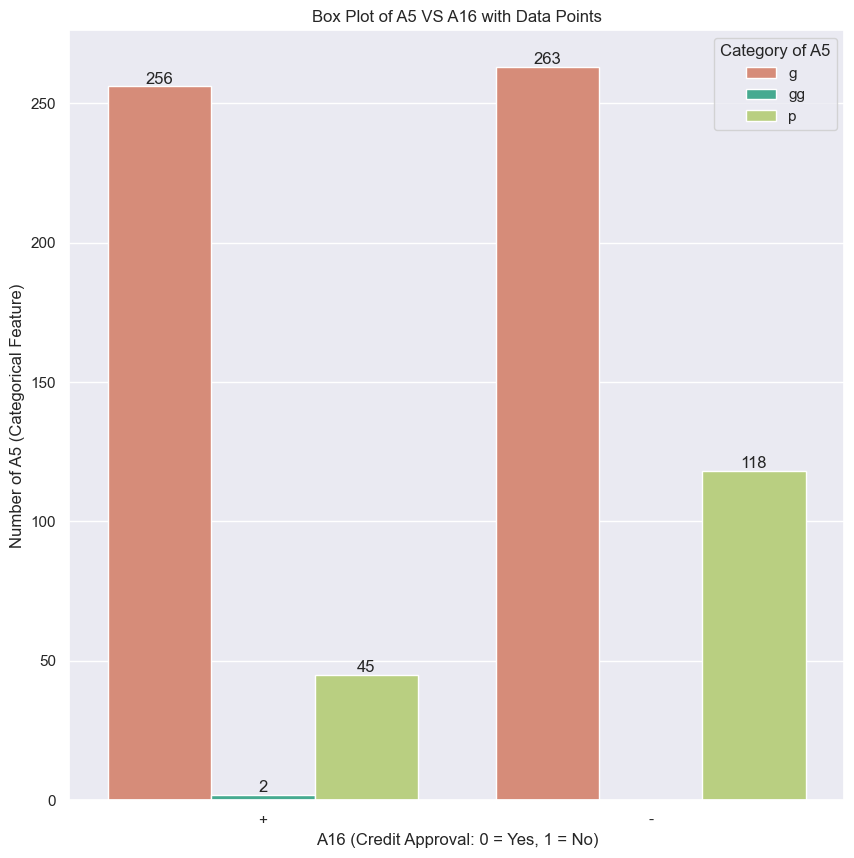

In [48]:
plotBarPlot('A5', (10,10))

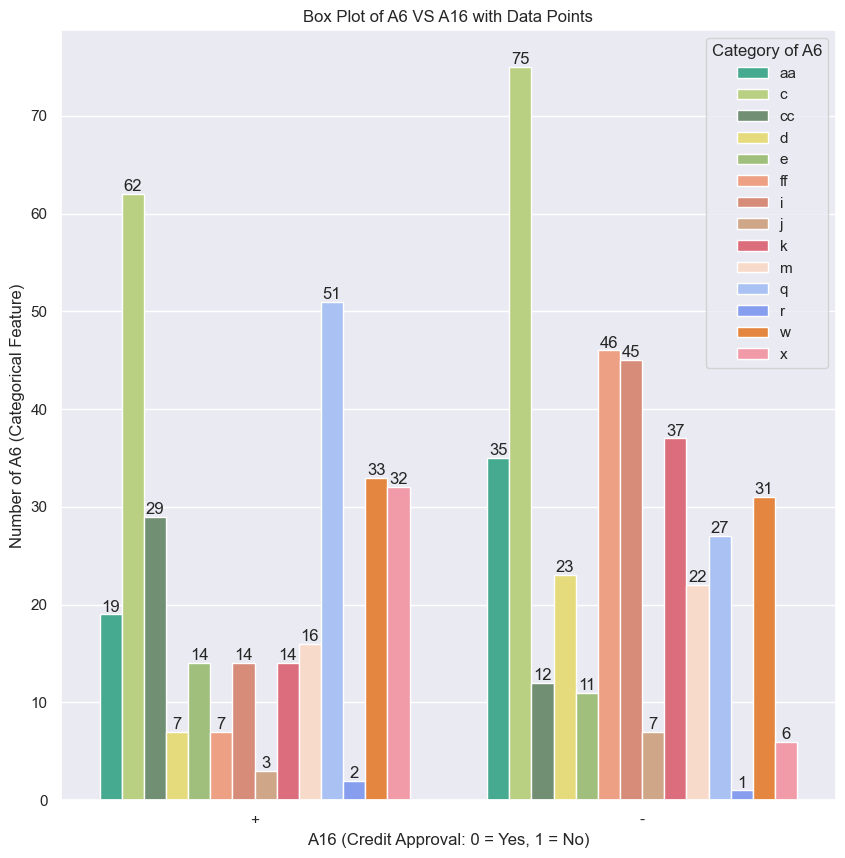

In [49]:
plotBarPlot('A6', (10,10))

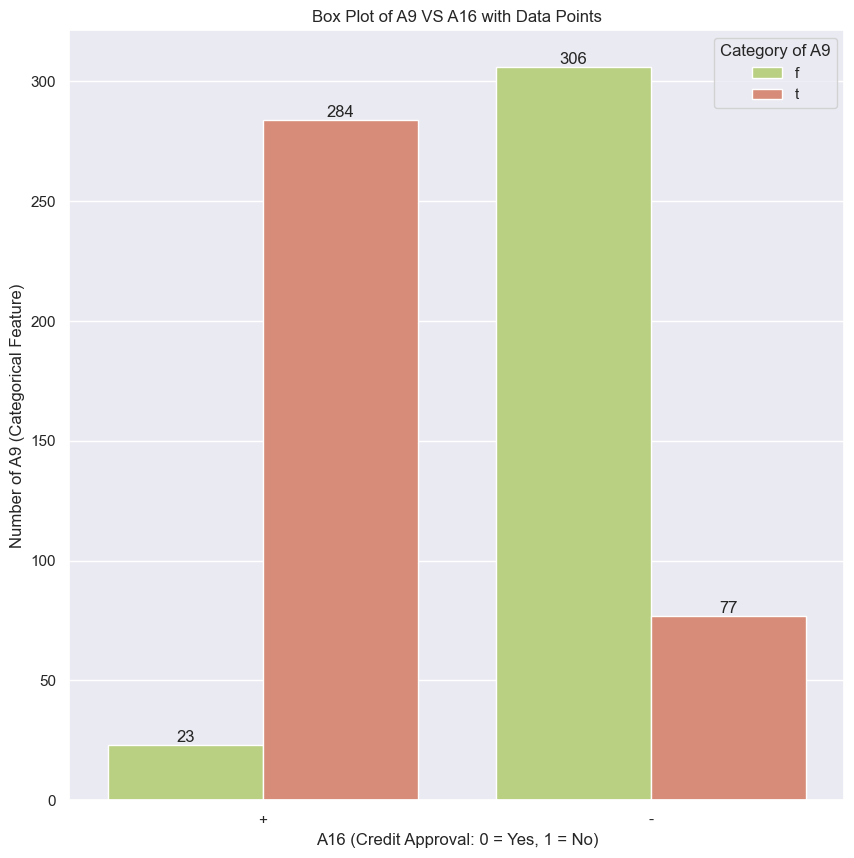

In [50]:
plotBarPlot('A9', (10,10))

------------------------------------------------------------------------
Data Preparation Start 

# Data Cleaning

## Handling Missing Value 

### Imputing Missing Continuous Variable

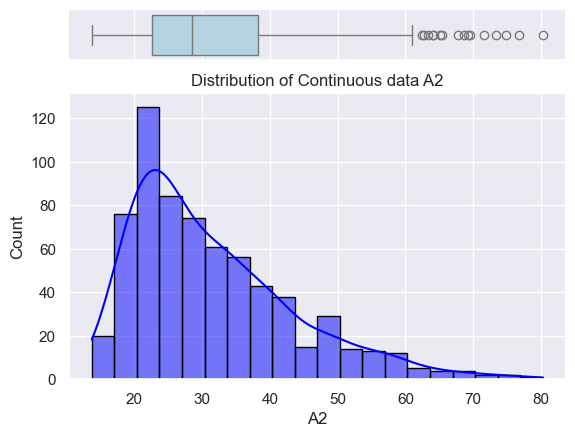

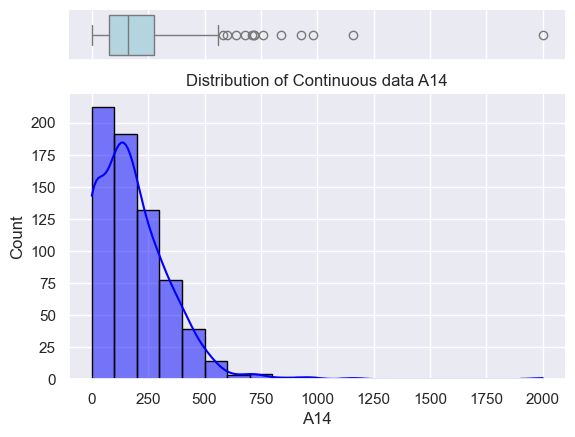

In [51]:
# view the distribution of A2 and A14 
plotHistBP('A2')
plotHistBP('A14')

- both A2 and A14 are right skewed so to prevent be affect by outlier, we are going to use MEDIAN

In [52]:
# prepare function for imputing process
def getNullRowByCol(col) : 
    # show all columns that input (eg A2) is NaN
    # get True False map
    return pd.isnull(ca_df[col])

def replaceByMedian(col) : 
    # get the median of col
    median = ca_df[col].median()

    ca_df[col] = ca_df[col].fillna(median)

def replaceByLOCF(col) : 
    # using Last Observation Carried Forward (LOCF) 
    ca_df[col] = ca_df[col].ffill()

#### A2

In [53]:
bo = getNullRowByCol('A2')
    
# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,928.0,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,-
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010,-
286,a,NaN,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,-
329,b,NaN,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0,-
445,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
450,b,NaN,3.000,y,p,i,bb,7.000,f,f,0,f,g,0.0,1,-
500,b,NaN,4.000,u,g,x,v,5.000,t,t,3,t,g,290.0,2279,+


In [54]:
# CALL function to replace
replaceByMedian('A2')

# take a look on the result after imputing 
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
83,a,28.46,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0,-
86,b,28.46,0.375,u,g,d,v,0.875,t,f,0,t,s,928.0,0,-
92,b,28.46,5.000,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,-
97,b,28.46,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,-
254,b,28.46,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010,-
286,a,28.46,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,-
329,b,28.46,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0,-
445,a,28.46,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
450,b,28.46,3.000,y,p,i,bb,7.000,f,f,0,f,g,0.0,1,-
500,b,28.46,4.000,u,g,x,v,5.000,t,t,3,t,g,290.0,2279,+


#### A14

In [55]:
bo = getNullRowByCol('A14')

# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,+
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,+
270,b,37.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,NaN,0,-
330,b,20.42,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,NaN,18,-
445,a,28.46,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
456,b,34.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,-


In [56]:
# CALL function to replace
replaceByMedian('A14')

# take a look on the result after imputing 
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,160.0,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,160.0,600,+
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,160.0,26726,+
270,b,37.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,160.0,0,-
330,b,20.42,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,160.0,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,160.0,18,-
445,a,28.46,11.250,u,g,ff,ff,0.000,f,f,0,f,g,160.0,5200,-
456,b,34.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,160.0,0,-


### Imputing Missing Categorical Variable

#### A1

In [57]:
bo = getNullRowByCol('A1')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,+
327,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,-
346,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372.0,122,-
374,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260.0,1004,-
453,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300.0,0,-
479,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-
489,NaN,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263.0,0,-
520,NaN,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,160.0,234,+
598,NaN,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240.0,768,+
601,NaN,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,-


In [58]:
replaceByLOCF('A1')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
248,a,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,+
327,b,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,-
346,b,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372.0,122,-
374,b,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260.0,1004,-
453,b,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300.0,0,-
479,b,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-
489,b,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263.0,0,-
520,b,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,160.0,234,+
598,a,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240.0,768,+
601,a,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,-


#### A4

In [59]:
bo = getNullRowByCol('A4')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
270,b,37.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
330,b,20.42,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
456,b,34.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
592,b,23.17,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
622,a,25.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+


In [60]:
replaceByLOCF('A4')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
270,b,37.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
330,b,20.42,0.0,y,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
456,b,34.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
592,b,23.17,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
622,a,25.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+


#### A5

In [61]:
bo = getNullRowByCol('A5')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
270,b,37.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
330,b,20.42,0.0,y,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
456,b,34.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
592,b,23.17,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
622,a,25.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+


In [62]:
replaceByLOCF('A5')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
270,b,37.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
330,b,20.42,0.0,y,p,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
456,b,34.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
592,b,23.17,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
622,a,25.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+


#### A6

In [63]:
bo = getNullRowByCol('A6')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
270,b,37.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
330,b,20.42,0.00,y,p,NaN,NaN,0.000,f,f,0,f,p,160.0,0,-
456,b,34.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,-
479,b,26.50,2.71,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,NaN,NaN,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
601,a,42.25,1.75,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+


In [64]:
replaceByLOCF('A6')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,160.0,0,+
270,b,37.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,160.0,0,+
330,b,20.42,0.00,y,p,i,NaN,0.000,f,f,0,f,p,160.0,0,-
456,b,34.58,0.00,u,g,w,NaN,0.000,f,f,0,f,p,160.0,0,-
479,b,26.50,2.71,y,p,i,NaN,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,w,NaN,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,c,NaN,0.000,f,f,0,f,p,160.0,0,+
601,a,42.25,1.75,y,p,k,NaN,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,c,NaN,0.000,f,f,0,f,p,160.0,0,+


#### A7

In [65]:
bo = getNullRowByCol('A7')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,160.0,0,+
270,b,37.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,160.0,0,+
330,b,20.42,0.00,y,p,i,NaN,0.000,f,f,0,f,p,160.0,0,-
456,b,34.58,0.00,u,g,w,NaN,0.000,f,f,0,f,p,160.0,0,-
479,b,26.50,2.71,y,p,i,NaN,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,w,NaN,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,c,NaN,0.000,f,f,0,f,p,160.0,0,+
601,a,42.25,1.75,y,p,k,NaN,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,c,NaN,0.000,f,f,0,f,p,160.0,0,+


In [66]:
replaceByLOCF('A7')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,q,h,0.000,f,f,0,f,p,160.0,0,+
270,b,37.58,0.00,u,g,q,n,0.000,f,f,0,f,p,160.0,0,+
330,b,20.42,0.00,y,p,i,v,0.000,f,f,0,f,p,160.0,0,-
456,b,34.58,0.00,u,g,w,v,0.000,f,f,0,f,p,160.0,0,-
479,b,26.50,2.71,y,p,i,v,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,w,bb,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,c,h,0.000,f,f,0,f,p,160.0,0,+
601,a,42.25,1.75,y,p,k,v,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,c,j,0.000,f,f,0,f,p,160.0,0,+


### Result after Handling Missing Value

In [67]:
print("NULL Object > ", ca_df.select_dtypes('object').isna().sum().sum())
print("NULL Int > ", ca_df.select_dtypes('int').isna().sum().sum())
print("NULL Float > ", ca_df.select_dtypes('float').isna().sum().sum())

NULL Object >  0
NULL Int >  0
NULL Float >  0


# Data Preprocessing

## Encode Categorical Data

In [68]:
# select all data type in object 
encodeList = ca_df.select_dtypes(include="object")

In [69]:
# encode categorical data with using OrdinalEncoder
encoder = OrdinalEncoder()

# Dictionary to store the mappings
mappings = {}

for col in encodeList.columns:
    encoder.fit(ca_df[[col]])
    ca_df[col] = encoder.fit_transform(ca_df[[col]])

    # Store the mapping of original values to encoded values
    # enumerate = convert to a list that have index number 
    # code, category = index and orginalLabel
    mappings[col] = {category: code for code, category in enumerate(encoder.categories_[0])}
        
ca_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,202.0,0,0.0
1,0.0,58.67,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,43.0,560,0.0
2,0.0,24.50,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,280.0,824,0.0
3,1.0,27.83,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,100.0,3,0.0
4,1.0,20.17,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,120.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,21.08,10.085,2.0,2.0,4.0,3.0,1.25,0.0,0.0,0,0.0,0.0,260.0,0,1.0
686,0.0,22.67,0.750,1.0,0.0,1.0,7.0,2.00,0.0,1.0,2,1.0,0.0,200.0,394,1.0
687,0.0,25.25,13.500,2.0,2.0,5.0,2.0,2.00,0.0,1.0,1,1.0,0.0,200.0,1,1.0
688,1.0,17.92,0.205,1.0,0.0,0.0,7.0,0.04,0.0,0.0,0,0.0,0.0,280.0,750,1.0


### Label for Each Encode data

In [70]:
# Display the mappings 
# each value have been encode to what value 
for col, mapping in mappings.items():
    print(f"Column: {col}")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")

Column: A1
  a -> 0
  b -> 1
Column: A4
  l -> 0
  u -> 1
  y -> 2
Column: A5
  g -> 0
  gg -> 1
  p -> 2
Column: A6
  aa -> 0
  c -> 1
  cc -> 2
  d -> 3
  e -> 4
  ff -> 5
  i -> 6
  j -> 7
  k -> 8
  m -> 9
  q -> 10
  r -> 11
  w -> 12
  x -> 13
Column: A7
  bb -> 0
  dd -> 1
  ff -> 2
  h -> 3
  j -> 4
  n -> 5
  o -> 6
  v -> 7
  z -> 8
Column: A9
  f -> 0
  t -> 1
Column: A10
  f -> 0
  t -> 1
Column: A12
  f -> 0
  t -> 1
Column: A13
  g -> 0
  p -> 1
  s -> 2
Column: A16
  + -> 0
  - -> 1


## Data Discovery and Profiling

### Correlation Analysis with Pairplots

https://study.com/academy/lesson/scatter-plot-and-correlation-definition-example-analysis.html#:~:text=A%20scatterplot%20with%20no%20correlation,pattern%2C%20neither%20positive%20nor%20negative.&text=The%20scatterplot%20shows%20haphazard%20points%20that%20follow%20no%20direction. 

<Figure size 1000x1000 with 0 Axes>

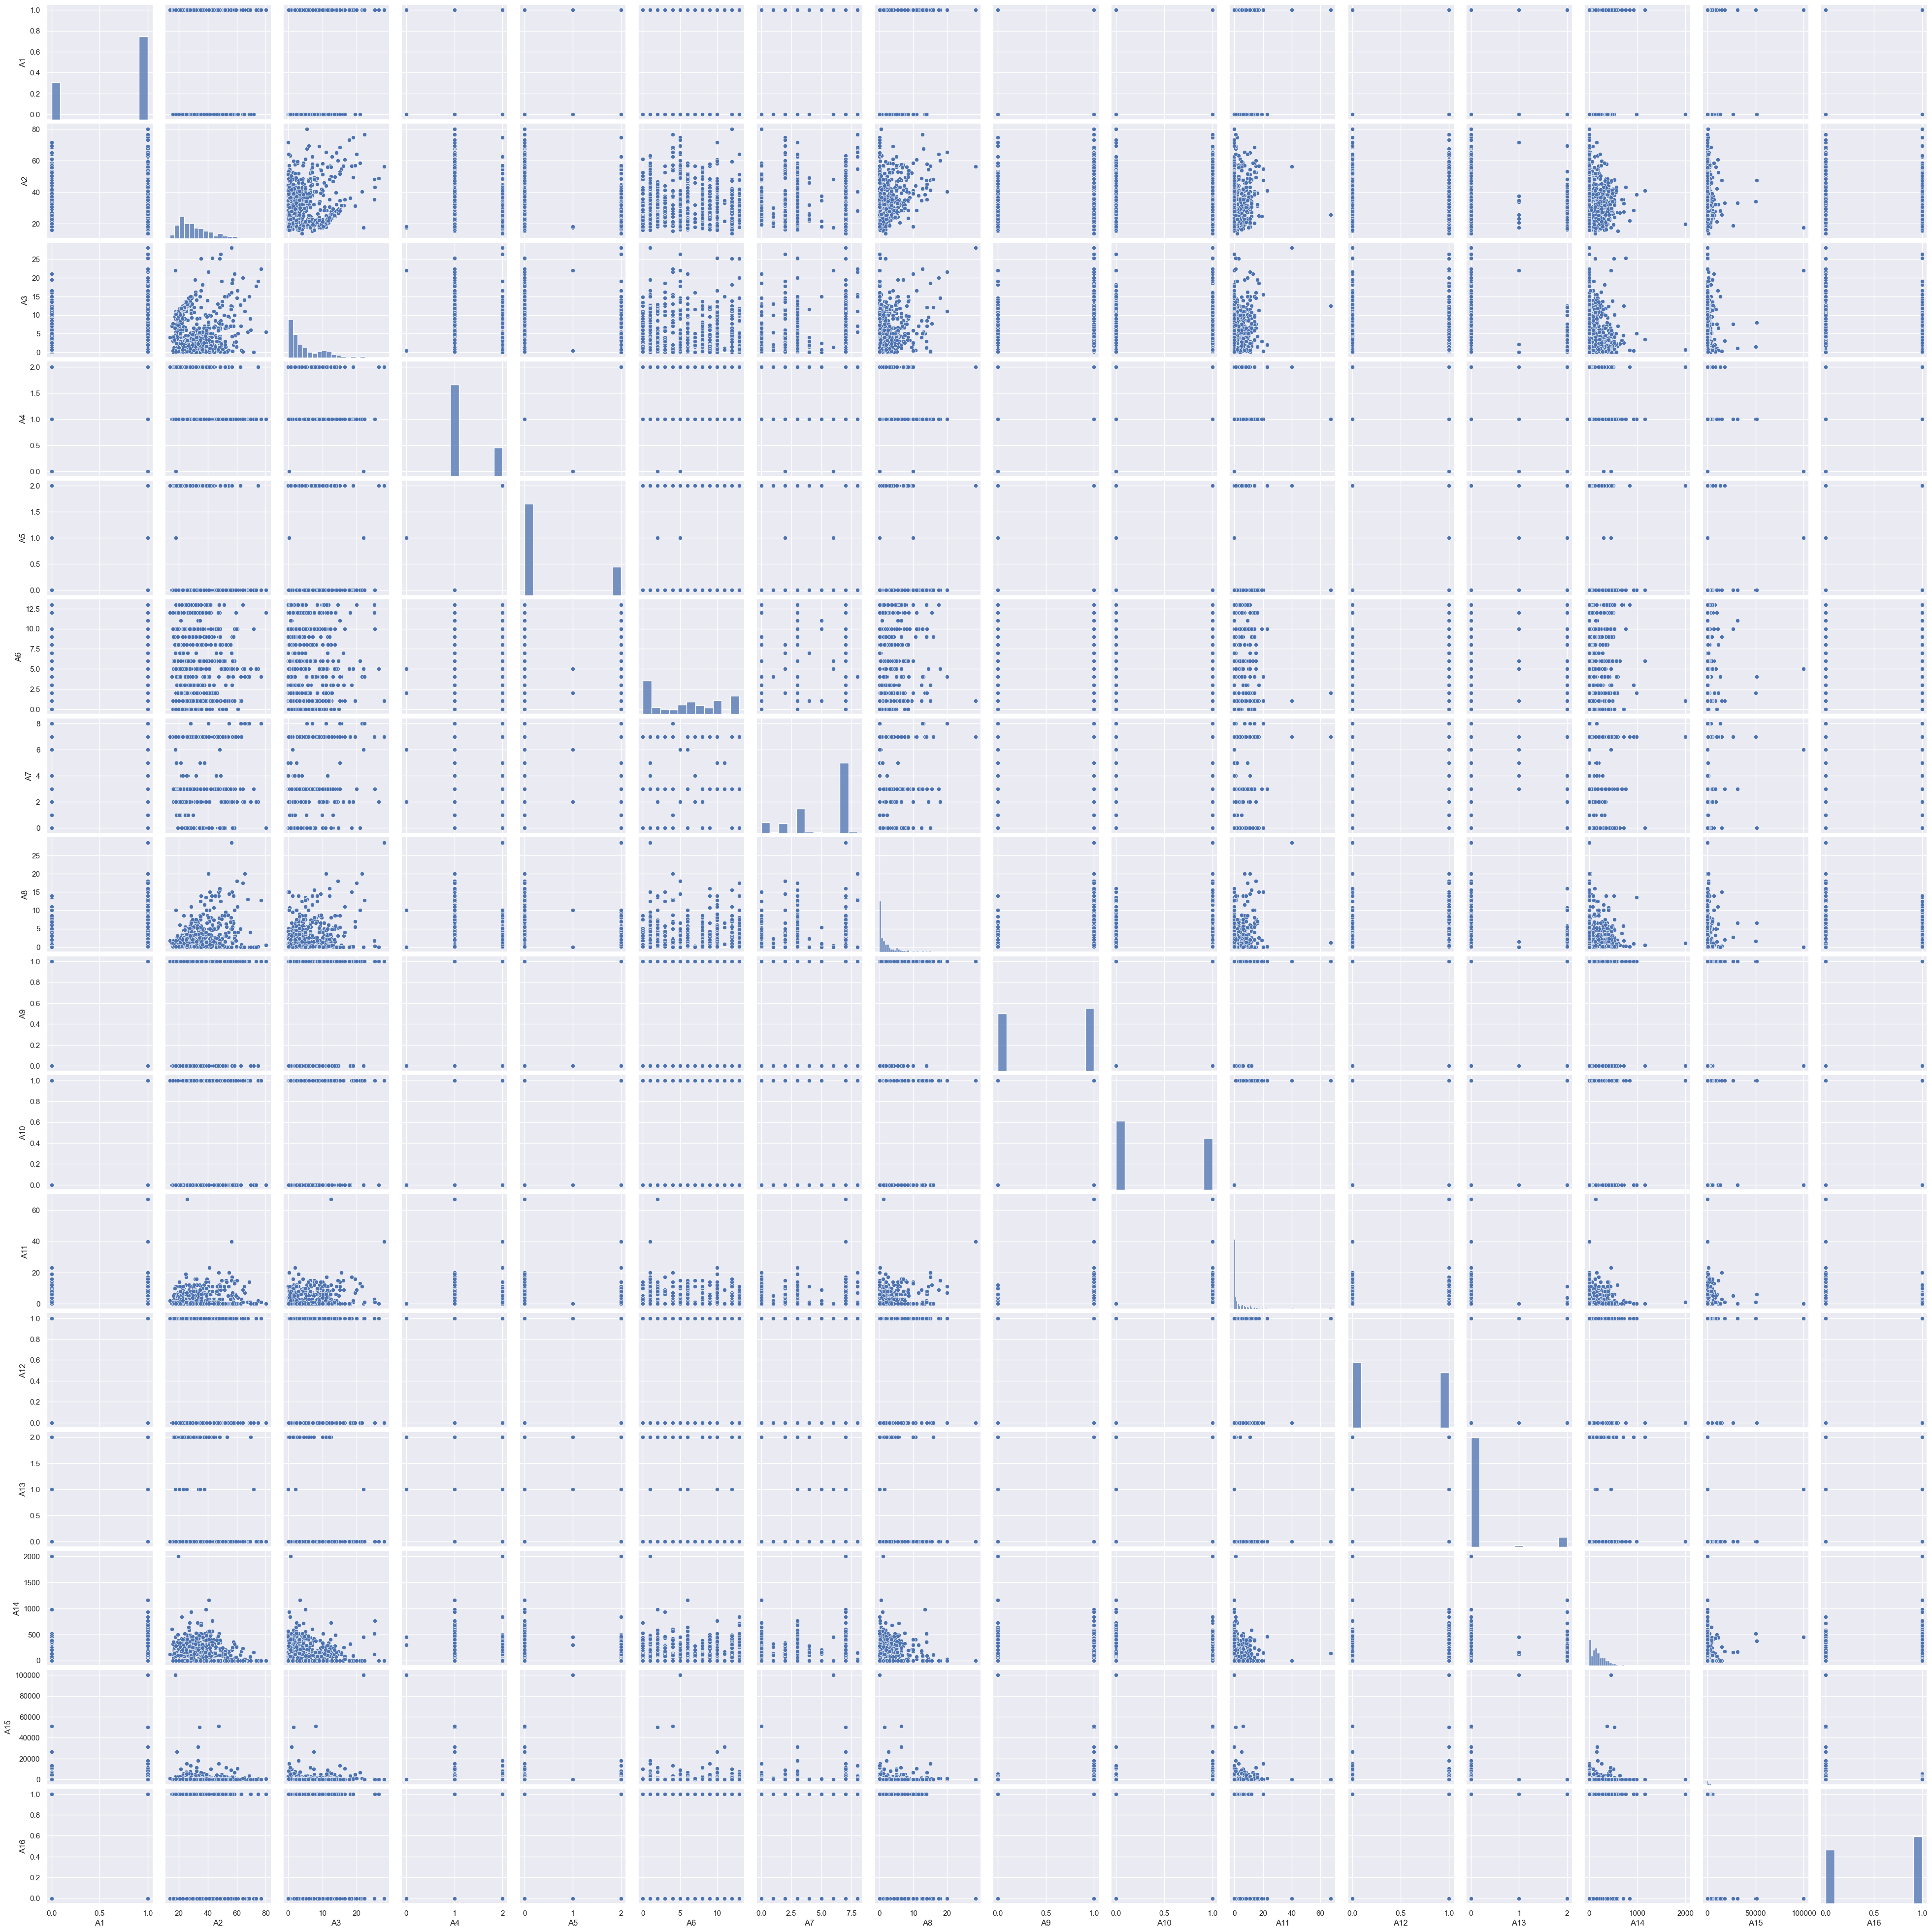

In [71]:
plt.figure(figsize=(10, 10))
sns.pairplot(ca_df)
plt.show()

### Correlation Matrix with Heatmap

- +1: Perfect positive correlation (when one variable increases, the other increases proportionally).
- 0: No correlation (no relationship between variables).
- -1: Perfect negative correlation (when one variable increases, the other decreases proportionally).

In [72]:
correlation_matrix = ca_df.corr()

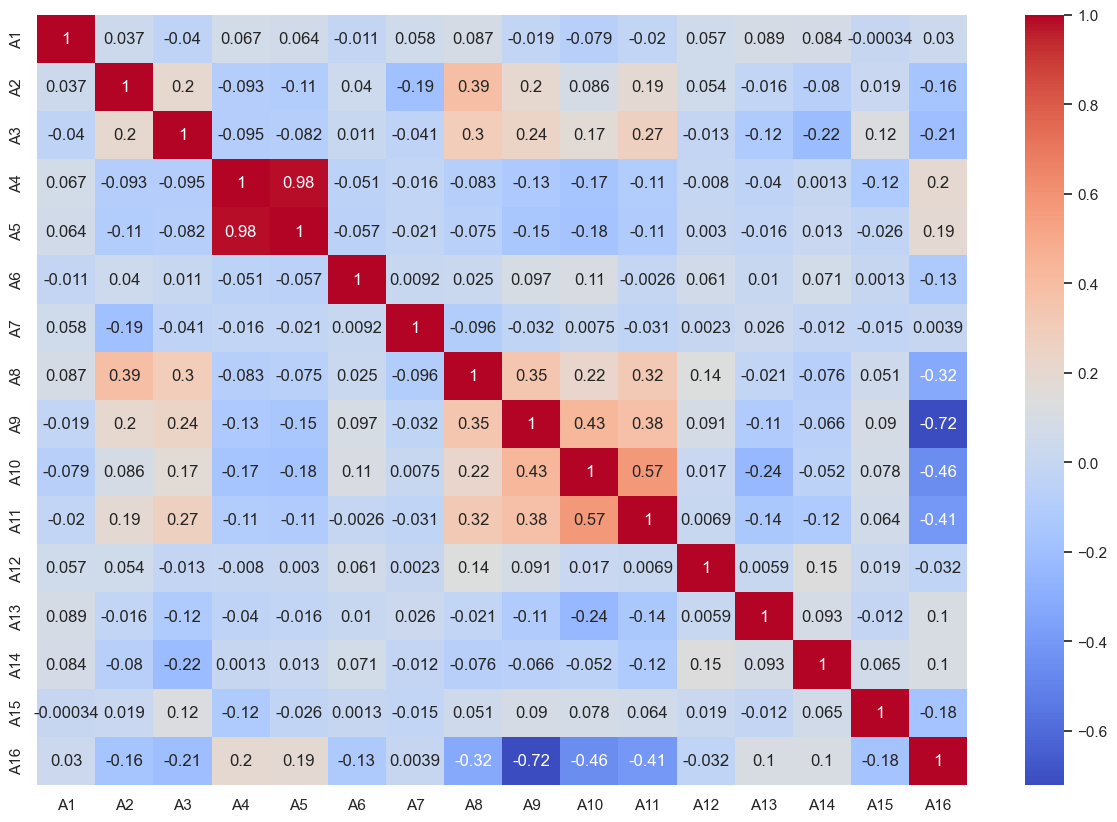

In [73]:
# use heatmap to know the correlation between x
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

### Remove weak relationship feature 

In [74]:
# get the range of relationship need to be keep 
strong_corr = correlation_matrix[(correlation_matrix > 0.04) | (correlation_matrix < -0.04)]

# convert all weak relationship become true by using true false map
checkWeak = strong_corr.isnull()

# do filter on only get the weak relationship row
checkWeak = checkWeak[checkWeak['A16'] == True]

# view result
checkWeak

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
A1,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,True
A7,False,False,False,True,True,True,False,False,True,True,True,True,True,True,True,True
A12,False,False,True,True,True,False,True,False,False,True,True,False,True,False,True,True


In [75]:
# drop columns
ca_df = ca_df.drop(columns=checkWeak.index)

ca_df

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15,A16
0,30.83,0.000,1.0,0.0,12.0,1.25,1.0,1.0,1,0.0,202.0,0,0.0
1,58.67,4.460,1.0,0.0,10.0,3.04,1.0,1.0,6,0.0,43.0,560,0.0
2,24.50,0.500,1.0,0.0,10.0,1.50,1.0,0.0,0,0.0,280.0,824,0.0
3,27.83,1.540,1.0,0.0,12.0,3.75,1.0,1.0,5,0.0,100.0,3,0.0
4,20.17,5.625,1.0,0.0,12.0,1.71,1.0,0.0,0,2.0,120.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,2.0,2.0,4.0,1.25,0.0,0.0,0,0.0,260.0,0,1.0
686,22.67,0.750,1.0,0.0,1.0,2.00,0.0,1.0,2,0.0,200.0,394,1.0
687,25.25,13.500,2.0,2.0,5.0,2.00,0.0,1.0,1,0.0,200.0,1,1.0
688,17.92,0.205,1.0,0.0,0.0,0.04,0.0,0.0,0,0.0,280.0,750,1.0


## Outlier Detection and Treatment

### Detecting Outlier

In [90]:
# Compute Z-scores for numerical columns
z_scores = np.abs(zscore(ca_df.select_dtypes(include=['float64', 'int64'])))

# set threshold become 3.5 due to 3 have too much of outlier 
threshold = 3.5
outliers_zscore = (z_scores > threshold)

# Output the outlier rows
outlier_indices = np.where(outliers_zscore)

print("Outlier data points based on Z-score method:")
# outlier_indices = ([row number of outlier],[??])
process_df = ca_df.iloc[outlier_indices[0]]

display(process_df)
print(f"Total Number of Row of Outlier > {process_df.index.size}")

Outlier data points based on Z-score method:


,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15,A16
242,28.33,5.000,1.0,0.0,12.0,11.000,1.0,0.0,0,0.0,70.0,0,0.0
537,35.25,3.165,1.0,0.0,13.0,3.750,1.0,0.0,0,0.0,680.0,0,1.0
270,37.58,0.000,1.0,0.0,10.0,0.000,0.0,0.0,0,1.0,160.0,0,0.0
141,56.50,16.000,1.0,0.0,7.0,0.000,1.0,1.0,15,0.0,0.0,247,0.0
164,60.58,16.500,1.0,0.0,10.0,11.000,1.0,0.0,0,0.0,21.0,10561,0.0
622,25.58,0.000,1.0,0.0,1.0,0.000,0.0,0.0,0,1.0,160.0,0,0.0
557,32.17,1.460,1.0,0.0,12.0,1.085,1.0,1.0,16,0.0,120.0,2079,0.0
117,52.50,6.500,1.0,0.0,8.0,6.290,1.0,1.0,15,0.0,0.0,11202,0.0
456,34.58,0.000,1.0,0.0,12.0,0.000,0.0,0.0,0,1.0,160.0,0,1.0
424,33.67,2.165,1.0,0.0,1.0,1.500,0.0,0.0,0,1.0,120.0,0,1.0


Total Number of Row of Outlier > 26


check dont affect the categorical data that only hava lesser value 
- A13 > p ( 1 )
- A7 > o ( 6 ), n ( 5 ), dd ( 1 ), z ( 8 ), j ( 4 ) ( drop )
- A6 > r ( 11 ), j ( 7 )
- A5 > gg ( 1 )
- A4 > l ( 0 )

In [91]:
# set list due to data already been encoded
notInclude = [["A13", [ 1 ]],
              ["A6", [11, 7]],
              ["A5", [1]],
              ["A4", [0]]]

process_df = ca_df.iloc[outlier_indices[0]]

for column, values_to_exclude in notInclude:
    # exclude rows where the column value is in the values_to_exclude list
    process_df = process_df[~process_df[column].isin(values_to_exclude)]

display(process_df)
print(f"Total Number of Row of Outlier after Update > {process_df.index.size}")

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15,A16
242,28.33,5.000,1.0,0.0,12.0,11.000,1.0,0.0,0,0.0,70.0,0,0.0
537,35.25,3.165,1.0,0.0,13.0,3.750,1.0,0.0,0,0.0,680.0,0,1.0
164,60.58,16.500,1.0,0.0,10.0,11.000,1.0,0.0,0,0.0,21.0,10561,0.0
557,32.17,1.460,1.0,0.0,12.0,1.085,1.0,1.0,16,0.0,120.0,2079,0.0
117,52.50,6.500,1.0,0.0,8.0,6.290,1.0,1.0,15,0.0,0.0,11202,0.0
116,37.75,7.000,1.0,0.0,10.0,11.500,1.0,1.0,7,0.0,300.0,5,1.0
108,40.92,2.250,2.0,2.0,13.0,10.000,1.0,0.0,0,0.0,176.0,0,1.0
32,49.50,7.585,1.0,0.0,6.0,7.585,1.0,1.0,15,0.0,0.0,5000,0.0
210,39.33,5.875,1.0,0.0,2.0,10.000,1.0,1.0,14,0.0,399.0,0,0.0
505,31.33,19.500,1.0,0.0,1.0,7.000,1.0,1.0,16,0.0,0.0,5000,0.0


Total Number of Row of Outlier after Update > 11


### Handling Outlier

In [92]:
# drop all 32 rows 
ca_df = ca_df.drop(index=process_df.index)

ca_df

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15,A16
597,21.50,6.000,1.0,0.0,0.0,2.50,1.0,1.0,3,0.0,80.0,918,0.0
686,22.67,0.750,1.0,0.0,1.0,2.00,0.0,1.0,2,0.0,200.0,394,1.0
7,22.92,11.585,1.0,0.0,2.0,0.04,1.0,0.0,0,0.0,80.0,1349,0.0
672,50.25,0.835,1.0,0.0,0.0,0.50,0.0,0.0,0,0.0,240.0,117,1.0
52,37.42,2.040,1.0,0.0,12.0,0.04,1.0,0.0,0,0.0,400.0,5800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,40.58,5.000,1.0,0.0,1.0,5.00,1.0,1.0,7,0.0,0.0,3065,0.0
278,24.58,13.500,2.0,2.0,5.0,0.00,0.0,0.0,0,0.0,160.0,0,1.0
294,16.08,0.335,1.0,0.0,5.0,0.00,0.0,1.0,1,0.0,160.0,126,1.0
426,27.67,2.040,1.0,0.0,12.0,0.25,0.0,0.0,0,0.0,180.0,50,1.0


## Splitting Data by using Train_Test Split
- Stratified Sampling included 

In [93]:
# shuffle the A16 column data 
ca_df = shuffle(ca_df)

In [94]:
# export as csv file for further use 
ca_df.to_csv('csvDataFile/cleanData.csv', index=False) 

------------------------------------------------------------------
# Test Model start from here 

In [2]:
# read again 
clean_df = pd.read_csv('csvDataFile/cleanData.csv')

clean_df.shape

(662, 13)

In [3]:
# drop target columns
x = clean_df.drop(columns=['A16']) 
y = clean_df['A16']

In [4]:
x.head()

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15
0,35.17,3.750,1.0,0.0,5.0,0.000,0.0,1.0,6,0.0,0.0,200
1,40.00,6.500,1.0,0.0,0.0,3.500,1.0,1.0,1,0.0,0.0,500
2,22.67,7.000,1.0,0.0,1.0,0.165,0.0,0.0,0,0.0,160.0,0
3,18.42,9.250,1.0,0.0,10.0,1.210,1.0,1.0,4,0.0,60.0,540
4,20.67,1.835,1.0,0.0,10.0,2.085,1.0,1.0,5,0.0,220.0,2503


In [5]:
x = x.values

x

array([[ 35.17 ,   3.75 ,   1.   , ...,   0.   ,   0.   , 200.   ],
       [ 40.   ,   6.5  ,   1.   , ...,   0.   ,   0.   , 500.   ],
       [ 22.67 ,   7.   ,   1.   , ...,   0.   , 160.   ,   0.   ],
       ...,
       [ 21.5  ,   6.   ,   1.   , ...,   0.   ,  80.   , 918.   ],
       [ 27.25 ,   1.665,   1.   , ...,   0.   , 399.   , 827.   ],
       [ 31.08 ,   3.085,   1.   , ...,   0.   , 160.   ,  41.   ]])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20, random_state=0)
# training using x_train and y_train

In [7]:
print(f"Size of x_train > {len(x_train)}")
print(f"Size of x_test > {len(x_test)}")

Size of x_train > 529
Size of x_test > 133


## Data Scailing by using MinMaxScaler

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))

rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.transform(x_test)

print(rescaledX_train)

[[2.52556054e-01 7.00000000e-02 5.00000000e-01 ... 0.00000000e+00
  5.00000000e-02 3.00000000e-05]
 [3.21434978e-01 3.77272727e-02 5.00000000e-01 ... 0.00000000e+00
  1.51500000e-01 3.29000000e-02]
 [2.25650224e-01 5.90909091e-01 5.00000000e-01 ... 0.00000000e+00
  7.00000000e-02 1.11000000e-02]
 ...
 [1.31479821e-01 2.27272727e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.94529148e-01 4.93181818e-02 1.00000000e+00 ... 0.00000000e+00
  8.50000000e-02 1.79000000e-03]
 [9.41704036e-02 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  2.25000000e-02 1.00000000e-05]]


### Export Scaler For Future Use

In [9]:
# joblib.dump(scaler, 'scaler/scaler.pkl')

# Random Forest Classification

In [10]:
# Import RandomForestClassifier and RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import pickle

In [11]:
random_forest_model_default = RandomForestClassifier()
random_forest_model_default = random_forest_model_default.fit(rescaledX_train, y_train)

y_pred_rf_train = random_forest_model_default.predict(rescaledX_train)
y_pred_rf_test = random_forest_model_default.predict(rescaledX_test)

### Check accuracy ( Score, RMSE, Confusion Matrix )

In [29]:
# display the RMSE and accuracy for both test and train 
print("Acurracy of Train Data with default parameters  > ", accuracy_score(y_train, y_pred_rf_train))
print("RMSE for Train Data with default parameters     > ", np.sqrt(mean_squared_error(y_train, y_pred_rf_train)))
print("\n")
print("Acurracy of Test Data with default parameters   > ", accuracy_score(y_test, y_pred_rf_test))
print("RMSE for Test Data with default parameters      > ", np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))

Acurracy of Train Data with default parameters  >  1.0
RMSE for Train Data with default parameters     >  0.0


Acurracy of Test Data with default parameters   >  0.9097744360902256
RMSE for Test Data with default parameters      >  0.3003757045930553


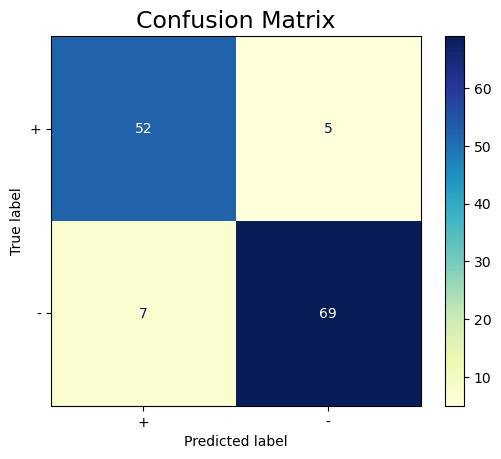

In [13]:
confusion_rf_default = confusion_matrix(y_test, y_pred_rf_test)

diagram = ConfusionMatrixDisplay(confusion_matrix=confusion_rf_default, display_labels=['+', '-'])
diagram.plot(cmap=plt.cm.YlGnBu)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [14]:
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90        57
         1.0       0.93      0.91      0.92        76

    accuracy                           0.91       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.91      0.91      0.91       133



### Parameter Distributions

In [15]:
# Do hyperparameter tuning

#Number of trees in random forest
n_estimators = [int(i) for i in range(50,300,50)]

#Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]

#Maximum number of levels in tree
max_depth = [None, 10, 20, 30, 40]

#Measures the quality of each split
criterion = ['gini','entropy']

param_grid = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'max_depth': max_depth,
    'criterion': criterion
}

### Random Search CV

In [16]:
random_forest_model_RS = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator = random_forest_model_RS, param_distributions = param_grid, cv = 10, scoring = 'accuracy', verbose = 1, n_jobs = 4)
random_forest_model_RS = random_search.fit(rescaledX_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
# Get the best parameters and the best score
print("Best n_estimators        > ", random_forest_model_RS.best_params_['n_estimators'])
print("Best min_samples_split   > ", random_forest_model_RS.best_params_['min_samples_split'])
print("Best max_depth           > ", random_forest_model_RS.best_params_['max_depth'])
print("Best criterion           > ", random_forest_model_RS.best_params_['criterion'])

print("The best score get from random search > ", random_forest_model_RS.best_score_)

Best n_estimators        >  100
Best min_samples_split   >  8
Best max_depth           >  None
Best criterion           >  entropy
The best score get from random search >  0.8695573294629899


In [18]:
#Predict train and test
y_pred_rfrs_train = random_forest_model_RS.predict(rescaledX_train)
y_pred_rfrs_test = random_forest_model_RS.predict(rescaledX_test)

In [30]:
# display the RMSE and accuracy for both test and train 
print("Acurracy of Train Data after Random Search  > ", accuracy_score(y_train, y_pred_rfrs_train))
print("RMSE for Train Data after Random Search     > ", np.sqrt(mean_squared_error(y_train, y_pred_rfrs_train)))
print("\n")
print("Acurracy of Test Data after Random Search   > ", accuracy_score(y_test, y_pred_rfrs_test))
print("RMSE for Test Data after Random Search      > ", np.sqrt(mean_squared_error(y_test, y_pred_rfrs_test)))

Acurracy of Train Data after Random Search  >  0.9640831758034026
RMSE for Train Data after Random Search     >  0.18951734537133363


Acurracy of Test Data after Random Search   >  0.9172932330827067
RMSE for Test Data after Random Search      >  0.28758784208880117


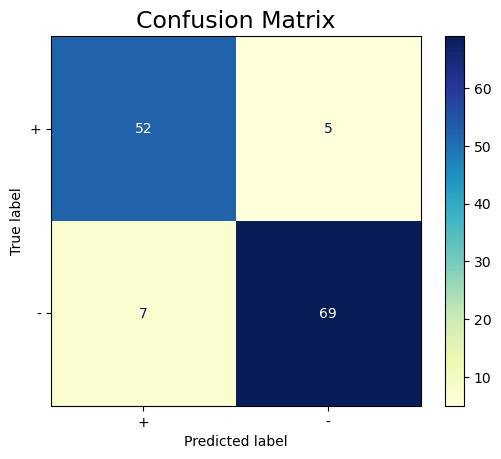

In [20]:
confusion_rf_RS = confusion_matrix(y_test, y_pred_rf_test)

diagram = ConfusionMatrixDisplay(confusion_matrix=confusion_rf_RS, display_labels=['+', '-'])
diagram.plot(cmap=plt.cm.YlGnBu)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [21]:
print(classification_report(y_test, y_pred_rfrs_test))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91        57
         1.0       0.96      0.89      0.93        76

    accuracy                           0.92       133
   macro avg       0.91      0.92      0.92       133
weighted avg       0.92      0.92      0.92       133



### Grid Search CV

In [22]:
random_forest_model_GS = RandomForestClassifier()

grid_search = GridSearchCV(estimator = random_forest_model_GS, param_grid = param_grid, cv = 5, scoring='accuracy', n_jobs = 4)
random_forest_model_GS = grid_search.fit(rescaledX_train, y_train)

C:\Users\jeanl\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [23]:
# Get the best parameters and the best score
print("Best n_estimators        > ", random_forest_model_GS.best_params_['n_estimators'])
print("Best min_samples_split   > ", random_forest_model_GS.best_params_['min_samples_split'])
print("Best max_depth           > ", random_forest_model_GS.best_params_['max_depth'])
print("Best criterion           > ", random_forest_model_GS.best_params_['criterion'])

print("The best score get from random search > ", random_forest_model_RS.best_score_)

Best n_estimators        >  150
Best min_samples_split   >  8
Best max_depth           >  30
Best criterion           >  entropy
The best score get from random search >  0.8695573294629899


In [24]:
#Predict train and test
y_pred_rfgs_train = random_forest_model_GS.predict(rescaledX_train)
y_pred_rfgs_test = random_forest_model_GS.predict(rescaledX_test)

In [31]:
# display the RMSE and accuracy for both test and train 
print("Acurracy of Train Data after Grid Search  > ", accuracy_score(y_train, y_pred_rfgs_train))
print("RMSE for Train Data after Grid Search     > ", np.sqrt(mean_squared_error(y_train, y_pred_rfgs_train)))
print("\n")
print("Acurracy of Test Data after Grid Search   > ", accuracy_score(y_test, y_pred_rfgs_test))
print("RMSE for Test Data after Grid Search      > ", np.sqrt(mean_squared_error(y_test, y_pred_rfgs_test)))

Acurracy of Train Data after Grid Search  >  0.9546313799621928
RMSE for Train Data after Grid Search     >  0.21299910806810246


Acurracy of Test Data after Grid Search   >  0.9022556390977443
RMSE for Test Data after Grid Search      >  0.3126409456585232


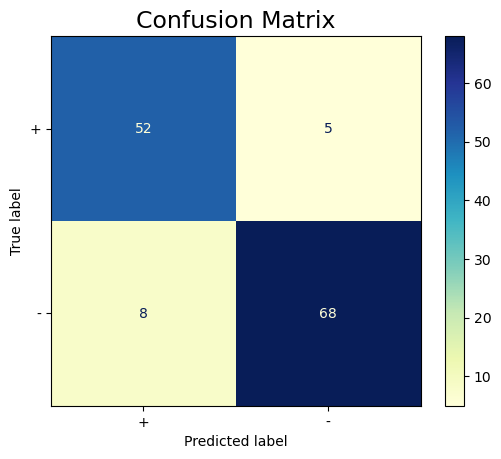

In [26]:
confusion_rf_GS = confusion_matrix(y_test, y_pred_rfgs_test)

diagram = ConfusionMatrixDisplay(confusion_matrix=confusion_rf_GS, display_labels=['+', '-'])
diagram.plot(cmap=plt.cm.YlGnBu)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [27]:
print(classification_report(y_test, y_pred_rfgs_test))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        57
         1.0       0.93      0.89      0.91        76

    accuracy                           0.90       133
   macro avg       0.90      0.90      0.90       133
weighted avg       0.90      0.90      0.90       133



### Export For Further Use

In [28]:
# pickle.dump(random_forest_model_default, open("pklFolder/model/RandomForestClassifier.pkl", 'wb'))
pickle.dump(random_forest_model_default, open("RandomForestClassifier.pkl", 'wb'))